# <font color=#025dfa> Hava Durumu Tahmin Etme - Weather Forecasting

Bu çalışmamızda makine öğrenmesi ile gelecek yıllanır sıcaklığını tahmin eden bir model oluşturacağız.

Kaynak/Source =  https://thecleverprogrammer.com/2020/06/11/weather-forecasting-with-machine-learning/

Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı. - Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

In [154]:
#pip install pycaret

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pycaret.regression import*

In [156]:
pd.set_option("display.max_columns",None)
# TR = En fazla kaç sütun olduğunu gösteriyor.
# EN = It shows the maximum number of columns.

In [157]:
df=pd.read_csv('Weather.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis

In [158]:
df.head()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [159]:
df.sample(5)

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
67,67,1968,17.52,18.98,23.18,25.89,27.77,28.24,27.12,26.90,26.61,24.32,21.56,19.20
48,48,1949,19.01,19.36,23.37,26.71,28.35,27.86,27.24,26.83,26.41,24.70,20.79,18.40
92,92,1993,18.37,20.84,22.71,26.50,28.73,28.50,27.24,27.29,26.34,24.88,22.20,19.55
91,91,1992,18.36,19.77,22.95,26.21,27.75,28.40,27.31,26.78,26.11,24.70,22.01,19.42
21,21,1922,18.30,20.50,23.65,26.55,29.80,28.03,27.26,26.95,26.04,23.94,21.28,18.39


In [160]:
df.tail()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
112,112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89
116,116,2017,20.59,23.08,25.58,29.17,30.47,29.44,28.31,28.12,28.11,27.24,23.92,21.47


In [161]:
df.shape

(117, 14)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  117 non-null    int64  
 1   YEAR        117 non-null    int64  
 2   JAN         117 non-null    float64
 3   FEB         117 non-null    float64
 4   MAR         117 non-null    float64
 5   APR         117 non-null    float64
 6   MAY         117 non-null    float64
 7   JUN         117 non-null    float64
 8   JUL         117 non-null    float64
 9   AUG         117 non-null    float64
 10  SEP         117 non-null    float64
 11  OCT         117 non-null    float64
 12  NOV         117 non-null    float64
 13  DEC         117 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.9 KB


In [163]:
df.isnull().sum().sort_values(ascending=True)

,0
Unnamed: 0,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0


In [164]:
df.describe()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,58.000000,1959.000000,18.423248,20.137949,23.434188,26.514103,28.386410,28.300940,27.369231,26.940085,26.342650,24.742051,21.765726,19.173333
std,33.919021,33.919021,0.612963,0.900944,0.862825,0.750740,0.644678,0.460603,0.345920,0.348876,0.387789,0.563152,0.634183,0.635912
min,0.000000,1901.000000,17.250000,17.790000,21.780000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000
25%,29.000000,1930.000000,18.070000,19.470000,22.840000,26.000000,27.950000,28.020000,27.150000,26.730000,26.110000,24.390000,21.320000,18.780000
50%,58.000000,1959.000000,18.350000,19.990000,23.330000,26.540000,28.340000,28.250000,27.340000,26.900000,26.310000,24.670000,21.720000,19.180000
75%,87.000000,1988.000000,18.720000,20.550000,23.930000,26.910000,28.820000,28.580000,27.530000,27.150000,26.500000,24.920000,22.150000,19.550000
max,116.000000,2017.000000,20.920000,23.580000,26.610000,29.560000,30.780000,29.880000,28.470000,28.170000,28.110000,27.240000,23.920000,21.890000


In [165]:
df.corr(numeric_only=True)

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Unnamed: 0,1.000000,1.000000,0.424095,0.531905,0.495396,0.408116,0.240393,0.320169,0.373547,0.516766,0.621623,0.476883,0.631653,0.656462
YEAR,1.000000,1.000000,0.424095,0.531905,0.495396,0.408116,0.240393,0.320169,0.373547,0.516766,0.621623,0.476883,0.631653,0.656462
JAN,0.424095,0.424095,1.000000,0.601501,0.456032,0.563134,0.365694,0.375436,0.399126,0.465346,0.546374,0.484244,0.504839,0.502171
FEB,0.531905,0.531905,0.601501,1.000000,0.562856,0.550205,0.467735,0.392240,0.445539,0.444043,0.505202,0.371735,0.446582,0.585669
MAR,0.495396,0.495396,0.456032,0.562856,1.000000,0.627709,0.378081,0.275558,0.248443,0.414879,0.429311,0.331754,0.428112,0.470999
APR,0.408116,0.408116,0.563134,0.550205,0.627709,1.000000,0.542415,0.342737,0.277163,0.459959,0.474800,0.446948,0.420935,0.481461
MAY,0.240393,0.240393,0.365694,0.467735,0.378081,0.542415,1.000000,0.345648,0.292579,0.478585,0.379402,0.406667,0.359000,0.382938
JUN,0.320169,0.320169,0.375436,0.392240,0.275558,0.342737,0.345648,1.000000,0.547269,0.575351,0.440450,0.427834,0.437434,0.451548
JUL,0.373547,0.373547,0.399126,0.445539,0.248443,0.277163,0.292579,0.547269,1.000000,0.612976,0.613086,0.566709,0.597194,0.498380
AUG,0.516766,0.516766,0.465346,0.444043,0.414879,0.459959,0.478585,0.575351,0.612976,1.000000,0.706028,0.683163,0.577769,0.589337


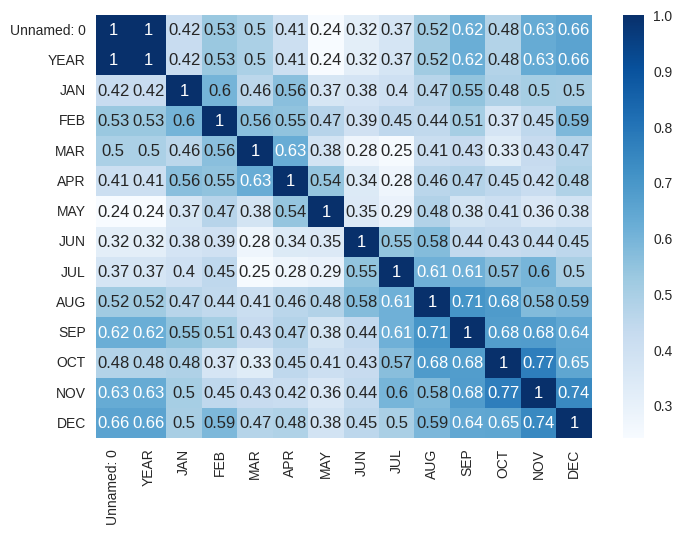

In [166]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

## <font color=#C0C0C0> Gereksiz Verileri Silme İşlemi Yapıyoruz - We Delete Unnecessary Data

In [167]:
df=df.drop('Unnamed: 0',axis=1)
df.head(1)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.6,27.49,26.98,26.26,25.08,21.73,18.95


In [168]:
setup(df,target='YEAR')

,Description,Value
0,Session id,8105
1,Target,YEAR
2,Target type,Regression
3,Original data shape,"(117, 13)"
4,Transformed data shape,"(117, 13)"
5,Transformed train set shape,"(81, 13)"
6,Transformed test set shape,"(36, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [169]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,16.2948,411.5790,19.8939,0.4925,0.0102,0.0083,0.3050
ada,AdaBoost Regressor,17.7849,430.6018,20.4698,0.4693,0.0105,0.0091,0.0940
et,Extra Trees Regressor,17.9313,448.9356,20.7868,0.4528,0.0107,0.0092,0.1490
rf,Random Forest Regressor,18.1790,481.9889,21.6045,0.4136,0.0111,0.0093,0.1840
ridge,Ridge Regression,19.6538,511.5668,22.2886,0.4135,0.0113,0.0100,0.0400
lr,Linear Regression,19.1883,514.9090,22.3402,0.4084,0.0114,0.0098,0.4860
lar,Least Angle Regression,19.1883,514.9085,22.3402,0.4084,0.0114,0.0098,0.0440
gbr,Gradient Boosting Regressor,18.3479,488.5828,21.6365,0.4069,0.0111,0.0094,0.1530
br,Bayesian Ridge,20.4199,538.4901,22.8989,0.3744,0.0117,0.0104,0.0240
xgboost,Extreme Gradient Boosting,19.0378,529.4391,22.5476,0.3088,0.0115,0.0098,0.1500


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling

In [170]:
x=df.drop('YEAR',axis=1)
y=df[['YEAR']]

In [171]:
x=pd.get_dummies(x,drop_first=True)
# Tr =  kategorik değişkenlerin sayısal değişkenlere dönüştürülmesi için kullanılır.
# En = It is used to convert categorical variables into numerical variables.

In [172]:
x=scale(x)

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
# TR = modelimizi eğittik.
# EN = We trained our model.

In [174]:
x = np.random.random((100, 64, 64, 3))  # 100 örnek, her biri 64x64, 3 kanal
y = np.random.randint(0, 2, size=(100, 1))  # İkili sınıflandırma etiketleri
x_test = np.random.random((24, 64, 64, 3))  # Örnek test verisi
y_test = np.random.randint(0, 2, size=(24, 1))  # Örnek etiketler
model = Sequential([

    # Örnek konvolüsyon katmanları
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    # TR = Bu katman, giriş verisinin belirli bir bölgesindeki (pool size) maksimum değeri seçerek, özellik haritalarının boyutlarını küçültür.
    # Havuzlama penceresinin boyutunu belirtir. 2x2 boyutunda bir pencere kullanılır.

    # EN = This layer reduces the size of the feature maps by selecting the maximum value in a specific region (pool size) of the input data.
    # It specifies the size of the pooling window. A 2x2 window is used.

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    # TR = Derin öğrenme modelindeki çok boyutlu (2D, 3D vb.) verileri tek boyutlu bir vektöre dönüştürür.
    # EN = It converts multidimensional (2D, 3D, etc.) data in the deep learning model into a one-dimensional vector.

    Dense(240, activation='relu'),
    # TR = Bu katman, tüm giriş nöronlarına bağlantı kurar ve her nöronun ağırlıklarını öğrenir. 240 nöron var.
    # Aktivasyon fonksiyonunu ReLU (Rectified Linear Unit) olarak ayarlar. ReLU fonksiyonu, negatif değerleri sıfıra dönüştürür ve pozitif değerleri olduğu gibi bırakır.

    # EN = This layer connects all input neurons and learns the weights of each neuron. There are 240 neurons.
    # Sets the activation function to ReLU (Rectified Linear Unit). The ReLU function converts negative values ​​to zero and leaves positive values ​​as is.

    BatchNormalization(),
    # TR = Bu katman, modelin eğitim sürecini daha stabil hale getirmek için kullanılır.
    # EN = This layer is used to make the training process of the model more stable.


    Dense(120, activation='relu'),
    BatchNormalization(),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(24, activation='relu'),
    BatchNormalization(),

    Dense(12, activation='relu'),
    BatchNormalization(),

    Dense(2, activation='relu'),
    Dropout(0.5),
    # TR = Derin öğrenme modelinde aşırı uyumu (overfitting) azaltmak için kullanılır.
    # EN = It is used to reduce overfitting in the deep learning model.

    Dense(1,activation='sigmoid')
    # TR = Sigmoid aktivasyon fonksiyonu, her bir nöronun çıkışını 0 ile 1 arasında bir değere dönüştürür.
    # Bu, özellikle ikili sınıflandırma problemlerinde her iki sınıfa ait olasılıkları tahmin etmek için uygundur.
    # EN = The sigmoid activation function transforms the output of each neuron into a value between 0 and 1.
    # This is particularly suitable for estimating probabilities of belonging to both classes in binary classification problems.

    # TR = activation='sigmoid' iki sınıftan birine ait olup olmadığını tahmin etmek için kullanılır. Örneğin, bir e-postanın spam olup olmadığını sınıflandırmak.
    # EN = activation='sigmoid' is used to predict whether an email belongs to one of two classes. For example, to classify whether an email is spam or not.
])

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
# TR = Mean Squared Error (MSE): Bu kayıp fonksiyonu, regresyon problemlerinde kullanılır. Modelin tahminleri ile gerçek değerler arasındaki farkların karelerinin ortalamasını hesaplar.
# EN = Mean Squared Error (MSE): This loss function is used in regression problems. It calculates the average of the squared differences between the model's predictions and the true values.

# TR = optimizer='adam': Adam (Adaptive Moment Estimation) optimizasyon algoritması, modelin ağırlıklarını güncellerken kullanılan bir yöntemdir.
# EN = optimizer='adam': Adam (Adaptive Moment Estimation) optimization algorithm is a method used when updating the weights of the model.

# TR = (MAE): Ortalama Mutlak Hata, modelin tahminleri ile gerçek değerler arasındaki farkların mutlak değerlerinin ortalamasını hesaplar.
# EN = (MAE): (MAE): Mean Absolute Error calculates the average of the absolute values ​​of the differences between the model's predictions and the true values.

In [175]:
history=model.fit(x,y,epochs=50,batch_size=32, validation_split=.20,verbose=1)
#epochs=Eğitim verilerinin tamamının modele aktarıldığı ve ardından modelin güncellenmesi işleminin bir kez gerçekleştirildiği bir döngü olarak tanımlanabilir.
#batch_size=Bir şeferde kaç tane satır alacağını ve hesaplayacağını şöylüyor
#validation_split=train_test_split gibi
#verbose=Modelin eğitimi sırasında konsola (veya diğer çıktı cihazlarına) yazdırılan bilgi miktarını kontrol eder.

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 338ms/step - loss: 0.2521 - mae: 0.4820 - val_loss: 0.2564 - val_mae: 0.5000
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step - loss: 0.2681 - mae: 0.4843 - val_loss: 0.2640 - val_mae: 0.5006
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - loss: 0.2861 - mae: 0.4964 - val_loss: 0.2759 - val_mae: 0.5004
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - loss: 0.2756 - mae: 0.4921 - val_loss: 0.2953 - val_mae: 0.5007
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step - loss: 0.2756 - mae: 0.4942 - val_loss: 0.3074 - val_mae: 0.5010
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - loss: 0.2326 - mae: 0.4521 - val_loss: 0.3186 - val_mae: 0.5015
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - loss: 0.2145 - mae: 0.4240 - val_loss: 0.3156 - val_mae: 0.5010
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 0.2147 - mae: 0.4319 - val_loss: 0.3143 - val_mae: 0.5009
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 0.2260 - mae: 

In [176]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 240)                 │       1,106,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 240)                 │             960 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 120)                 │          28,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 120)                 │             480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 24)                  │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 12)                  │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 2)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2)                   │              

 Total params: 3,717,565 (14.18 MB)

 Trainable params: 1,238,881 (4.73 MB)

 Non-trainable params: 920 (3.59 KB)

 Optimizer params: 2,477,764 (9.45 MB)

In [177]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test doğruluğu: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2500 - mae: 0.5000
Test doğruluğu: 0.5000


In [178]:
pred=model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik.
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


In [179]:
r2_score(y_test,pred)
# TR = Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır ve arasındaki farkı bul.
# EN = Compare this with the actual (y_test) value and the predicted (pred) values ​​and find the difference between them.

-0.028634527388641917

In [180]:
mean_squared_error(y_test,pred)**.5
# TR = Burada, Root Mean Square Error bulduk. Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır arasındaki farkı bul ve **.5 ile karekökünü al.
# EN = Here, we found Root Mean Square Error. Compare this with the actual (y_test) value and the predicted (pred) values, find the difference and take the square root of **.5.

0.5000153362828711

In [181]:
mean_absolute_error(y_test,pred)
# TR = mean_absolute_error ile (y_test,pred) kullanarak değerini hesaplama.
# EN = Calculating the value of mean_absolute_error using (y_test,pred).

0.49997300406297046

In [182]:
loss_f=pd.DataFrame(history.history)

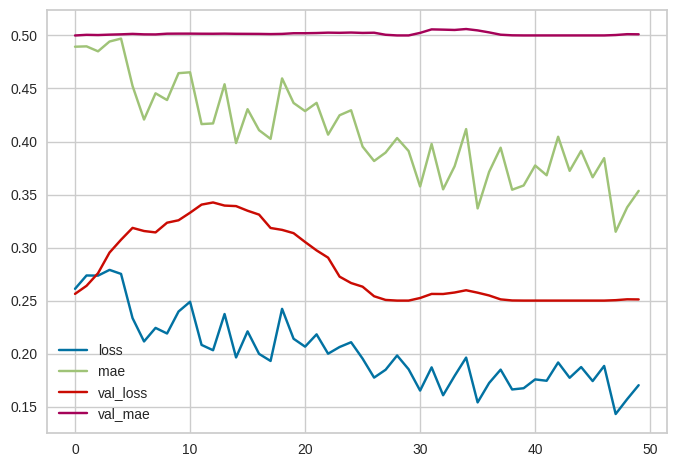

In [183]:
loss_f.plot();